In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import pandas as pd

In [32]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [37]:
resnet18 = models.resnet18()
resnet18 = resnet18.load_state_dict(torch.load('resnet18_Few_CNN_Layers_Only.pth',map_location=device))

RuntimeError: Error(s) in loading state_dict for ResNet:
	Unexpected key(s) in state_dict: "fc1.weight", "fc1.bias". 
	size mismatch for fc.weight: copying a param with shape torch.Size([4300, 512]) from checkpoint, the shape in current model is torch.Size([1000, 512]).
	size mismatch for fc.bias: copying a param with shape torch.Size([4300]) from checkpoint, the shape in current model is torch.Size([1000]).

In [16]:
data_dir = ''

In [20]:
#Define transforms for the training data and testing data
# train_transforms = transforms.Compose([transforms.RandomRotation(30),
#                                        transforms.RandomResizedCrop(224),
#                                        transforms.RandomHorizontalFlip(),
#                                        transforms.ToTensor(),
#                                        transforms.Normalize([0.485, 0.456, 0.406],
#                                                             [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

#pass transform here-in
# train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder('test', transform=test_transforms)
# valid_data = datasets.ImageFolder(data_dir + '/validation', transform=test_transforms)

#data loaders
# trainloader = torch.utils.data.DataLoader(train_data, batch_size=8, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=8, shuffle=True)
# validloader = torch.utils.data.DataLoader(valid_data, batch_size=8, shuffle=True)
print("Classes: ")
class_names = test_data.classes
print(class_names)

Classes: 
['infected', 'normal']


In [22]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs)
    imshow(out, title=[class_names[x] for x in classes])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


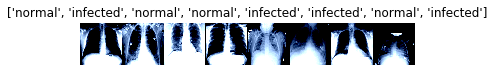

In [23]:
dataiter = iter(testloader)
images, labels = dataiter.next()
show_databatch(images, labels)

In [27]:
images, labels = images.to(device), labels.to(device) #-->convert test image to cuda (if available)
outputs = resnet18(images)                               #--> forward pass
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_names[predicted[j]]
                              for j in range(len(images))))
print('Ground Truth: ', ' '.join('%5s' % class_names[labels[j]]
                              for j in range(len(images))))

TypeError: 'collections.OrderedDict' object is not callable